# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:

biva = pd.crosstab(df['sex'], df['flag_doente'], margins=True)

biva['media_doente'] = biva[1] / 2
biva

biva['odds'] = biva[0]/biva[1]
biva
biva['rc_fml_masc'] = biva['odds']/biva.loc[1.0,'odds']

biva['woe'] = np.log(biva['rc_fml_masc'])
biva

flag_doente,0,1,All,media_doente,odds,rc_fml_masc,woe
sex,,,,,,,
0.0,72,25,97,12.5,2.880000,3.568696,1.272200
1.0,92,114,206,57.0,0.807018,1.000000,0.000000
All,164,139,303,69.5,1.179856,1.461996,0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [39]:

df['age_group'] = pd.cut(df['age'],bins=5)


biage= pd.crosstab(df['age_group'], df['flag_doente'] , margins=True)

biage.columns=['numerosa', 'numerodoentes', 'total']

biage['quantidade media doentes'] = biage['numerodoentes']/ biage['total']

biage['odds'] = biage['numerosa']/biage['numerodoentes']
btotal = biage['total']

bodds = biage['odds']

In [41]:

odds_total = btotal + bodds

biage['Odds ratio'] = biage['odds'] / odds_total

biage['logito'] = np.log(biage['odds'])

biage['woe'] = np.log(biage['Odds ratio'])
biage.head()

,numerosa,numerodoentes,total,quantidade media doentes,odds,Odds ratio,logito,woe
age_group,,,,,,,,
"(28.952, 38.6]",8,3,11,0.272727,2.666667,0.195122,0.980829,-1.634131
"(38.6, 48.2]",50,21,71,0.295775,2.380952,0.032446,0.867501,-3.428164
"(48.2, 57.8]",56,41,97,0.422680,1.365854,0.013885,0.311780,-4.276914
"(57.8, 67.4]",40,67,107,0.626168,0.597015,0.005549,-0.515813,-5.194206
"(67.4, 77.0]",10,7,17,0.411765,1.428571,0.077519,0.356675,-2.557227


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

C:\Users\gerar\AppData\Local\Temp\ipykernel_16168\3586649900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='numerodoentes', data=biage, palette='coolwarm')


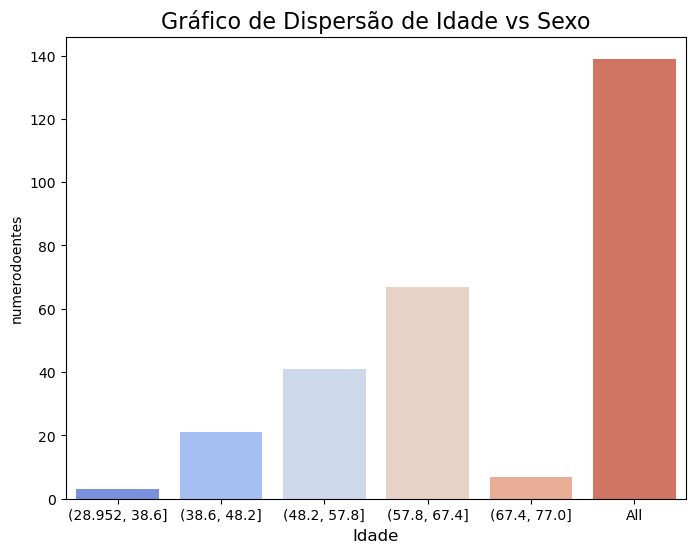

In [46]:

plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='numerodoentes', data=biage, palette='coolwarm')


plt.title('Gráfico de Dispersão de Idade vs Sexo', fontsize=16)
plt.xlabel('Idade', fontsize=12)

plt.show()
